In [1]:
import pandas as pd
users_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [2]:
users_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [3]:
users_data.shape

(2954, 3)

In [4]:
users_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [5]:
users_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [6]:
users_data.age.describe()

count    2954.000000
mean       44.196005
std        14.248336
min        20.000000
25%        32.000000
50%        44.000000
75%        56.000000
max        69.000000
Name: age, dtype: float64

In [7]:
users_data.nunique()

client     2954
premium       2
age          50
dtype: int64

In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
logs.shape

(4500, 4)

In [10]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [12]:
logs.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [13]:
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

Узнаю, кто из пользователей совершил максимальное количество успешных операций

In [14]:
success_number = logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success': 'count'}) \
    .rename(columns={'success': 'success_number'})  \
    .sort_values('success_number', ascending = False)

In [15]:
success_number.head()

,client,success_number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41


In [16]:
maximum_success = success_number.success_number.max()
maximum_success

41

In [17]:
list_success_number = success_number.query('success_number == @maximum_success') \
    .sort_values('client') \
    .client \
    .tolist()
list_success_number

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [18]:
", ".join(str(number) for number in list_success_number)

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

**Пользователи с номерами, представленными выше, совершили максимальное количество успешных операций (41 успешную операцию)**

In [19]:
logs.groupby('platform').agg({'success': sum}).success.idxmax()

'phone'

In [20]:
# или так:
logs.query('success == True').platform.value_counts().idxmax()

'phone'

**Наибольшее число успешных операций было совершено с телефона**

In [21]:
data = users_data.merge(logs)
data.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

**Премиальные клиенты также совершают операции преимущественно с телефона**

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Визуализирую распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

C:\Users\alina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

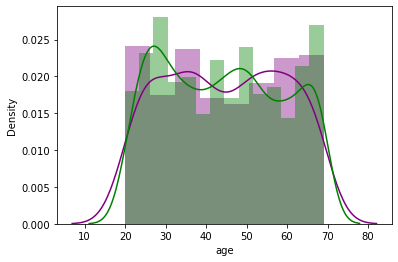

In [33]:
sns.distplot(data.query('premium == True').age, color = 'purple')
sns.distplot(data.query('premium == False').age, color = 'green')

Построю график распределения числа успешных операций, где  
х - число успешных операций,  
у - число клиентов, совершивших такое количество успешных операций

In [24]:
client_vs_number_success = data.groupby('client').agg({'success': sum})

In [25]:
client_vs_number_success.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

C:\Users\alina\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

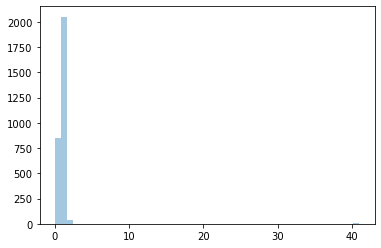

In [26]:
sns.distplot(client_vs_number_success, kde = False)

По графику видно, что хотя большинство пользователей совершили не более 5 успешных операций, был кто-то, кто совершил около 40 операций

Визуализирую число успешных операций, сделанных на платформе computer, в зависимости от возраста.  
По оси x – возраст, по оси y – число успешных операций.

In [27]:
computer_success = data.query('platform == "computer" and success == True')

In [28]:
computer_success.head()

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108


<AxesSubplot:xlabel='age', ylabel='count'>

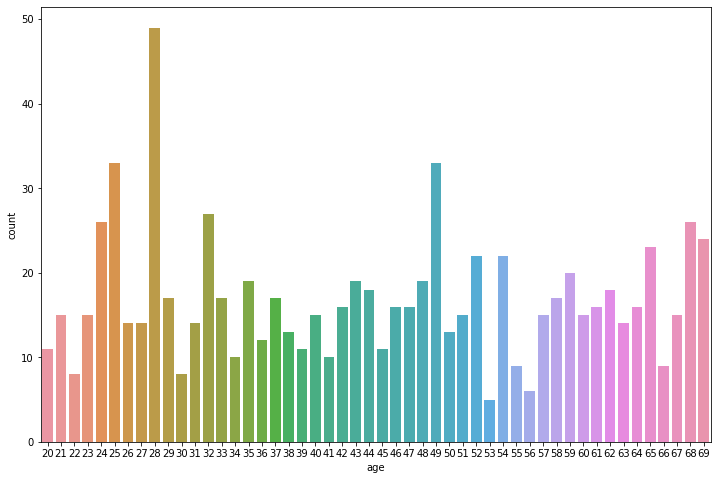

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(x="age", data = computer_success)
# countplot считает частоту встречаемости каждого из значений
# другой способ решения: сгруппировать данные по возрасту, посчитать сумму успехов для каждого возраста
# и построить barplot, где х - возраст, у - сумма успешных операций


**Наибольшее количество успешных операций совершили клиенты 28 лет**